# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>

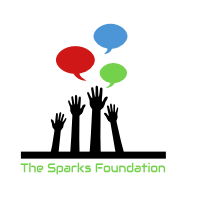

## <u><center>Data Science and Business Analytics</center></u>

### <center>Author : Dipika D. More</center>
 <br>

# <center>Task: Timeline Analysis : Covid-19</center> 


### Objective: 

● Create a storyboard showing spread of Covid-19 cases in your country or any
region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

● Dataset : https://bit.ly/30d2gdi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from datetime import datetime as d
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
from plotly.subplots import make_subplots
import dateutil
import plotly.express as px
import plotly.io as pio
import datetime
from statistics import mean 
import datetime as dt
import requests
from itertools import chain
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium import plugins
import os
import sys
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline

## Covid-19 Spread Worldwide 

In [ ]:
full = pd.read_csv("full_data (4).csv")
full = full[full['new_cases'].notna()]
full_ = full.groupby("date" ,as_index=False)[['new_cases','new_deaths']].sum()
full_["Date"] = pd.to_datetime(full_['date'])
full_['Week_Number'] = full_['Date'].dt.week
full__ = full_.groupby("Week_Number" ,as_index=False)[['new_cases','new_deaths']].mean()

In [ ]:
fig = px.bar(full_,x='date', y='new_cases', orientation='v',title = "COVID19-  daily new cases",
             labels=dict(x="Date", y="Count"))
fig.show()


In [ ]:
fig = px.line(x=full__["Week_Number"], y=full__["new_cases"], title = "7-day average of daily new cases",
             labels=dict(x="Week", y="Count"))
fig.show()

In [ ]:
df = pd.read_csv("covid_19_data.csv")
df.rename(columns={'ObservationDate':'Date','Province/State':'Province_State',
                   'Country/Region':'Country_Region','Confirmed':'ConfirmedCases',
                   'Deaths':'Fatalities'},inplace=True)
df.loc[df['Country_Region']=='Mainland China','Country_Region']='China'

df_world = df.copy()
df_world = df_world.groupby('Date',as_index=False)['ConfirmedCases','Fatalities','Recovered'].sum()

In [ ]:
l = [df_world.columns.to_list()[1] , df_world.columns.to_list()[2] ,df_world.columns.to_list()[3]]
fig = go.Figure()

for column in l:
    fig.add_trace(
        go.Scatter(
            x = df_world['Date'],
            y = df_world[column],
            name = column
        )
    )
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True,True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'ConfirmedCases',
                  method = 'update',
                  args = [{'visible': [True, False,False]}, 
                          {'title': 'ConfirmedCases',
                           'showlegend':True}]),
             dict(label = 'Fatalities',
                  method = 'update',
                  args = [{'visible': [False,True,False]},
                          {'title': 'Fatalities',
                           'showlegend':True}]),
              dict(label = 'Recovered',
                  method = 'update',
                  args = [{'visible': [False,False,True]},
                          {'title': 'Recovered',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

In [ ]:
#Get the top 5 countries
last_date = df.Date.max()
df_countries = df[df['Date']==last_date]
df_countries = df_countries.groupby('Country_Region', as_index=False)['ConfirmedCases','Fatalities','Recovered'].sum()
df_countries = df_countries.sort_values(by = 'ConfirmedCases',ascending =False)
df_trend = df.groupby(['Date','Country_Region'], as_index=False)['ConfirmedCases','Fatalities','Recovered'].sum()
top5 = df_trend.loc[df_trend['Country_Region'].isin(['US', 'Brazil', 'India', 'Russia', 'Colombia'])]
figa = px.line(top5, x='Date', y='ConfirmedCases', color='Country_Region', title='COVID19- Top 5 worst affected countries')
figa.show()

In [ ]:
df_countries_fatal = df_countries.sort_values(by = 'Fatalities',ascending =False)
top5_f = df_trend.loc[df_trend['Country_Region'].isin(['US', 'Brazil', 'India', 'Mexico', 'UK'])]
figb = px.line(top5_f, x='Date', y='Fatalities', color='Country_Region', title='COVID19- Top 5 countries with highest no. of deaths')
figb.show()

## Spread of Covid-19 in India 


In [ ]:
d1 = pd.read_csv('state_wise.csv')

d1['COVID_SPREAD'] = 'Recovered: ' + d1['Recovered'].astype(str) +'  Deceased: ' + d1['Deaths'].astype(str) 
d11 = d1.drop(0,)


cord = pd.read_csv("Indian Coordinates.csv")
cord.rename(columns={"Name of State / UT" :"State"},inplace = True)
cord = cord.drop(7).reset_index()
cord["State"]= cord["State"].replace({"Delhi": "NCT of Delhi", "Andaman and Nicobar" : "Andaman and Nicobar Island" , "Pondicherry" : "Puducherry", "Arunachal Pradesh":"Arunanchal Pradesh"  })  
final = pd.merge(d11,cord,on = "State")
final["Confirmed"] = final["Confirmed"].astype(float)



In [ ]:
m = folium.Map(location=[20,80], tiles="Stamen Terrain", zoom_start=4)

for Latitude, Longitude, State, Confirmed in zip(final.Latitude, final.Longitude ,final.State,final.Confirmed):
        folium.features.CircleMarker(
            [Latitude,Longitude],
            radius=Confirmed/20000,
            popup = ('<strong>State</strong>: ' + str(State).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(Confirmed) + '<br>'),
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(m)
m

In [ ]:
tri = pd.read_csv("case_time_series.csv")
t = tri.tail(1)
t['country'] = "India"
t['Total Confirmed'][282]
fig = go.Figure()
fig.add_trace(go.Bar(
    y=t["country"],
    x=t["Total Confirmed"],
    name = "Confirmed",
    orientation='h',
    marker=dict(
        color='rgba(2, 199, 99, 0.6)',
        line=dict(color='rgba(2, 199, 99,0.6)', width=0.5)
    )
    
))
fig.add_trace(go.Bar(
    y=t["country"],
    x=t["Total Recovered"],
    name = "Recovered",
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=0.5)
    )
))
fig.add_trace(go.Bar(
    y=t["country"],
    x=t["Total Deceased"],
    name = "Deceased",
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=0.5)
    )
    
))


fig.update_layout(barmode='stack')
fig.show()

In [ ]:
fig = px.bar(tri,x='Date_YMD', y='Daily Confirmed', orientation='v',title = "Daily new COVID19 cases in India" )
fig.update_layout(bargap = 0)
fig.show()

## Spread in India overtime

In [ ]:
l = [tri.columns.to_list()[4] , tri.columns.to_list()[6] ,tri.columns.to_list()[8]]
fig = go.Figure()

for column in l:
    fig.add_trace(
        go.Scatter(
            x = tri['Date'],
            y = tri[column],
            name = column,
        )
    )
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True,True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'ConfirmedCases',
                  method = 'update',
                  args = [{'visible': [True, False,False]}, 
                          {'title': 'ConfirmedCases',
                           'showlegend':True}]),
             dict(label = 'Recovered',
                  method = 'update',
                  args = [{'visible': [False,True,False]},
                          {'title': 'Recovered',
                           'showlegend':True}]),
              dict(label = 'Fatalities',
                  method = 'update',
                  args = [{'visible': [False,False,True]},
                          {'title': 'Fatalities',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

## Predict no. of confirmed cases in India for first week of November

Fit a logistic curve for total(cumulative) confirmed cases in India. Then predict from 1/11/20 to 7/11/20

In [ ]:
##fit a logistic curve for total confirmed cases in India. Then predict from 1/11/20 to 7/11/20
test = tri.tail(7)
tr = tri[0:276]

In [ ]:
##no. of days from first case
x_data = range(len(tr.index))
x = [number for number in x_data]
y_data = tr['Total Confirmed']

In [ ]:
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))


In [ ]:
# Fit the curve
parameters, v_cov = curve_fit(log_curve, x, y_data)
print(" ", parameters,"\n", v_cov)

In [ ]:
k = parameters[0]
x_0 = parameters[1]
ymax = parameters[2]

In [ ]:
y_fitted = log_curve(x_data, k, x_0, ymax)

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x,
                         y=y_data,
                         mode='markers',
                         name = 'no. of  cases')
             )


fig.add_trace(go.Scatter(x=x,
                         y=y_fitted,
                         mode='lines',
                         name='fitted',
                        ))

fig.show()

In [ ]:
xtest = np.arange(276,283,1)
ytest = test["Total Confirmed"]
y_fit = log_curve(xtest, k, x_0, ymax)
fig=go.Figure()
fig.add_trace(go.Scatter(x=xtest,
                         y=ytest,
                         mode='lines',
                         name = 'No. of cases')
             )

# regression data
fig.add_trace(go.Scatter(x=xtest,
                         y=y_fit,
                         mode='lines',
                         name='Predicted',
                         line=dict(color='firebrick', width=2)
                        ))

fig.show()


In [ ]:
##fitting metrics
MSLE = mean_squared_log_error(ytest,y_fit)
print("Mean squared log error (MSLE): ", '{:.6f}'.format(MSLE))
print("R2 score: ", '{:.3f}'.format(r2_score(ytest,y_fit)))

## Covid-19 Spread in India : State-Wise

In [ ]:
d1 = pd.read_csv('state_wise.csv')
import os
d1['COVID_SPREAD'] = 'Recovered: ' + d1['Recovered'].astype(str) +'  Deceased: ' + d1['Deaths'].astype(str) 
d11 = d1.drop(0,)
d11["State"]= d11["State"].replace({"Delhi": "NCT of Delhi", "Jammu and Kashmir" : "Jammu & Kashmir" , "Arunachal Pradesh" : "Arunanchal Pradesh", "Andaman and Nicobar Islands" : "Andaman & Nicobar Island"})
import json
states = json.load(open("states_india.geojson", 'r'))
state_id_map = {}
for feature in states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']

del state_id_map['Dadara & Nagar Havelli']
del state_id_map['Daman & Diu']
d11['id']  = d11['State'].apply(lambda x : state_id_map[x])
d11['Mortality Rate%'] = round((d11.Deaths/d11.Confirmed)*100,2)

In [ ]:
figg = px.choropleth(d11, geojson=states, color="Confirmed",
                    locations='id', 
                    hover_name='State',
                    hover_data=["Mortality Rate%",'Confirmed','Recovered','Deaths','Active'],
                    title='COVID19 SPREAD IN INDIA'
                   )
figg.update_geos(fitbounds="locations", visible=True)
figg.update_geos(projection_type="orthographic")
figg.update_layout(height=600,margin={"r":0,"t":30,"l":0,"b":30})
figg.show()

## States/UTs with highest mortality rate

In [ ]:
d111 = d11.sort_values(by = "Mortality Rate%",ascending = False).head(10)
f= px.bar(d111, x="State", y="Mortality Rate%")
f.show()

In [ ]:
import plotly.graph_objects as go
ds = d1.drop(0,)
ds = ds.sort_values(by = 'Confirmed')
dss = ds.tail(10)

fig = go.Figure()
fig.add_trace(go.Bar(
    y=dss["State"],
    x=dss["Deaths"],
    name = "Deceased",
    orientation='h',
    marker=dict(
        color='rgba(2, 199, 99, 0.6)',
        line=dict(color='rgba(2, 199, 99,0.6)', width=3)
    )
    
))
fig.add_trace(go.Bar(
    y=dss["State"],
    x=dss["Recovered"],
    name = "Recovered",
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=dss["State"],
    x=dss["Confirmed"],
    name = "Confirmed",
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
    
))


fig.update_layout(barmode='stack')
fig.show()

In [ ]:
##top5 states where testing is maximum
tes = pd.read_csv("StatewiseTestingDetails (1).csv")
tes1 = tes[tes['TotalSamples' ].notnull()]
tes2 = tes1[tes1['Positive'].notnull()]
tess = tes.groupby('State' ,as_index=False)[['TotalSamples','Positive']].max()
tess = tess.sort_values(by = 'TotalSamples').tail(10)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=tess["State"],
    x=tess["TotalSamples"],
    name = "Total tested",
    orientation='h',
    marker=dict(
        color='rgba(1130, 199, 99, 0.6)',
        line=dict(color='rgba(1130, 199, 99, 0.6)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=tess["State"],
    x=tess["Positive"],
    name = "Positive",
    orientation='h',
    marker=dict(
        color='rgba(900, 71, 80, 0.6)',
        line=dict(color='rgba(900, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.show()

In [ ]:
pos = pd.read_csv("ICMR_Testing_Data.csv")
fig = px.line(pos, x="day", y="positive_ratio", title='Test Positivity ratio for Mar-May')
fig.show()